# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][MS][HW03] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [1]:
import scipy.linalg
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [4]:
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return np.mean((y_true - y_predicted)**2)

def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    SS_res = np.sum((y_true - y_predicted)**2)
    SS_tot = np.sum(((y_true - np.mean(y_true))**2))
    return 1 - SS_res/SS_tot

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
class NormalLR:
    def __init__(self):
        self.W = None


    def fit(self, X:np.ndarray, y:np.ndarray):
        X = np.insert(X, 0, 1, axis = 1)
        XtX = np.transpose(X) @ X
        Xty = np.transpose(X) @ y
        self.W = scipy.linalg.solve(XtX, Xty)



    
    def predict(self, X:np.ndarray) -> np.ndarray:
        return X @ self.W[1:] + self.W[0]


In [6]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [7]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.01012220584999825, R2: 0.9986082491905647


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [48]:
class GradientLR:
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
        self.w = None


    def fit(self, X:np.ndarray, y:np.ndarray):
        X = np.insert(X, 0, 1, axis=1)
        self.w = np.zeros((X.shape[1], 1))
        y = y.reshape(-1, 1)
        for _ in range(self.iterations):
            # (1 / y.shape[0]) * X.T @ (X @ w - y) + self.lambda_ * np.sign(w)
            grad = (1/y.shape[0]) * X.T @ (X @ self.w - y) + self.l * np.sign(self.w)
            self.w = self.w - self.alpha * grad

    def predict(self, X:np.ndarray):
        return X.dot(self.w[1:]) + self.w[0]

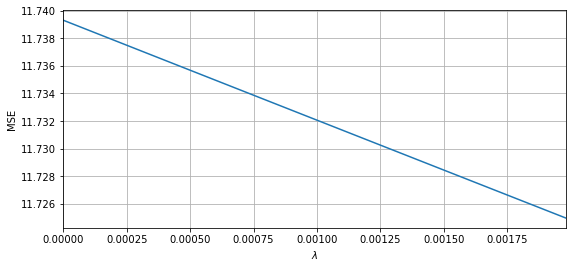

In [49]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.002, 0.00002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.xlabel("$\lambda$")
    plt.ylabel("MSE")
    plt.show()



X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)



build_plot(X_train, y_train, X_val, y_val)

In [50]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

ValueError: operands could not be broadcast together with shapes (185,) (205,) 

### Задание 4 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [ ]:
X, y = read_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=False)

In [ ]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_test, y_val)}")

In [ ]:
build_plot(X_train, y_train, X_val, y_val)

In [ ]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_test, y_val)}")

### Задание 5 (2 балла)
Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.